## ** Machine Learning Project : Linear Regression Analysis **

In [2]:
# Step 1 : import libraries
# import data manipulation library
import numpy as np
import pandas as pd

# import data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# import warning
import warnings
warnings.filterwarnings("ignore")

# import logging
import logging
logging.basicConfig(level=logging.INFO,
                    filemode='w',
                    filename="logs.log",
                    format="%(asctime)s - %(levelname)s - %(message)s",
                    force= True)

# import scikit-learn library
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# other important library
import time

In [3]:
# step 2 : Import dataset using pandas function
data = pd.DataFrame({
    'Feature1':np.random.randint(0,10000,1000),
    'Feature2':np.random.randint(0,30,1000),
    'Feature3':np.random.randint(20,10000,1000),
    'Target':np.random.randint(0,100,1000)
})

In [4]:
data

,Feature1,Feature2,Feature3,Target
0,1336,28,9894,28
1,9116,17,1860,27
2,7252,5,5936,97
3,6162,25,4001,27
4,3494,22,5172,92
...,...,...,...,...
995,2033,6,2996,59
996,8335,13,6099,35
997,1374,29,4782,99
998,3076,16,7570,72


In [5]:
# step 3 : checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Feature1  1000 non-null   int32
 1   Feature2  1000 non-null   int32
 2   Feature3  1000 non-null   int32
 3   Target    1000 non-null   int32
dtypes: int32(4)
memory usage: 15.8 KB


<Axes: >

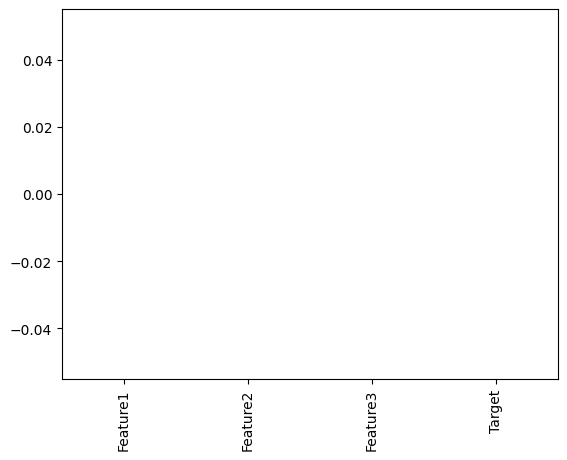

In [6]:
# step 4 : checking null values
data.isnull().sum().plot(kind='bar')

In [7]:
# step 5: EDA : Exploratory data analysis
from collections import OrderedDict
stats = []
for i in data.columns:
    numerical_stats = OrderedDict({
        'Features':i,
        'Count':data[i].count(),
        'Mean':data[i].mean(),
        'Median':data[i].median(),
        'Q1':data[i].quantile(0.25),
        'Q3':data[i].quantile(0.75),
        'IQR': data[i].quantile(0.75) - data[i].quantile(0.75),
        'Skewness':data[i].skew(),
        'Kurtosis':data[i].kurt()

    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Features,Count,Mean,Median,Q1,Q3,IQR,Skewness,Kurtosis
0,Feature1,1000,4904.162,4804.5,2374.75,7292.5,0.0,0.075579,-1.159355
1,Feature2,1000,14.593,15.0,7.00,22.0,0.0,-0.011197,-1.167278
2,Feature3,1000,4975.615,4968.5,2449.50,7438.5,0.0,0.019262,-1.155850
3,Target,1000,50.771,52.0,25.00,75.0,0.0,-0.034611,-1.199957


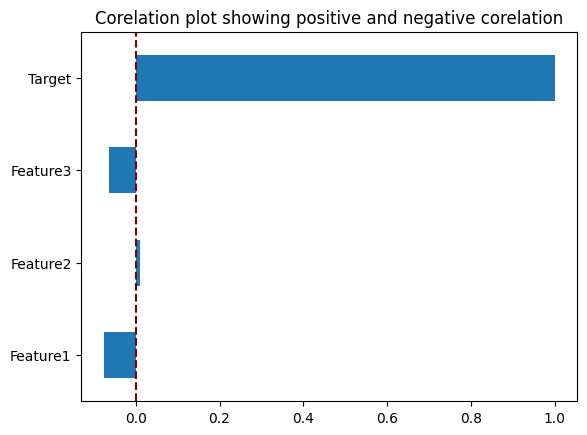

In [8]:
# checking corelation of features w.r.t. target column
data.corr()['Target'].plot(kind='barh')
plt.axvline(0,linestyle='--',color = 'maroon')
plt.title('Corelation plot showing positive and negative corelation')
plt.show()

In [9]:
# step 6 : Model building
start = time.time()

In [10]:
end =time.time()

In [11]:
time = end - start
time

0.02258753776550293

In [20]:
# step 6: model building
# X is a independent column 
X=data.drop(columns='Target',axis=1)

# y is a dependent column
y = data['Target']



In [24]:
X_train,Y_train,X_test,Y_test=train_test_split(X,y,test_size=0.30,random_state=0)
# maximum value of random state will be in the range 0 to 4294967295
# random state will allow to execute the same output 

In [25]:
# fit is always done with training data
# X_train : seen data
# X_test : unseen data
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [26]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model_LR= LinearRegression().fit(X_train,Y_train)
y_pred_LR = model_LR.predict(X_test)
r2_score(Y_test,y_pred_LR)

ValueError: Found input variables with inconsistent numbers of samples: [700, 300]